In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [2]:
import gym.spaces
import gym
import FastSLAM
import hw6_ppo
#importlib.reload(FastSLAM);
#importlib.reload(hw6_ppo);

# PPO training

In [3]:
env = gym.make('FastSLAM-v0')
agent = hw6_ppo.PPOAgent(env)

/home/ggrg/Documents/gym/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
gamma = 0.99
lamb = 0.95
number_of_actors = 8
number_of_iterations = 10
horizon = 100
number_of_epochs = 10
minibatch_size = 64
logstd_initial = -1 #-0.7
logstd_final = -2 # -1.6
epsilon = 0.2
use_multiprocess = True
res = agent.train(
    gamma,
    lamb,
    number_of_actors,
    number_of_iterations,
    horizon,
    number_of_epochs,
    minibatch_size,
    logstd_initial,
    logstd_final,
    epsilon,
    use_multiprocess,
)

/home/ggrg/Documents/gym/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [6]:
res

{'rewards': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'losses': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'losses_clip': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'losses_V': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'losses_entropy': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'stds': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'times_sample': [7.3090808391571045,
  4.122845888137817,
  3.976919651031494,
  4.173916816711426,
  3.770662546157837,
  3.806691884994507,
  4.04885458946228,
  3.8311431407928467,
  3.976428508758545,
  4.0977623462677],
 'times_opt': [0.09965133666992188,
  0.019314050674438477,
  0.022225141525268555,
  0.02806401252746582,
  0.01920795440673828,
  0.011543035507202148,
  0.018741130828857422,
  0.017584800720214844,
  0.025523900985717773,
  0.02054286003112793]}

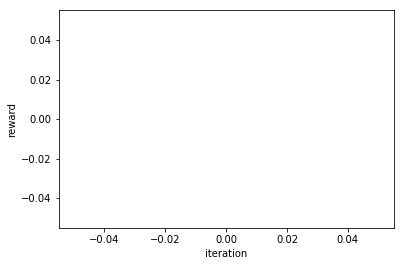

In [5]:
plt.plot(res['rewards'])
plt.xlabel('iteration')
plt.ylabel('reward');

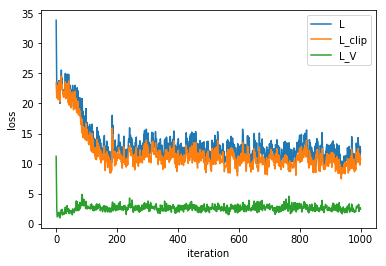

In [12]:
plt.plot(res['losses'], label='L')
plt.plot(res['losses_clip'], label='L_clip')
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend();

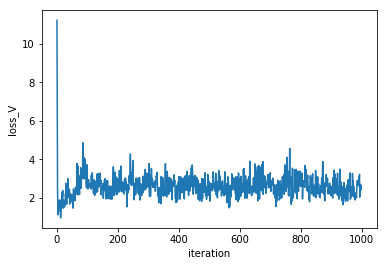

In [13]:
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss_V');

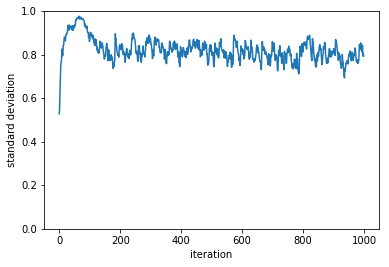

In [14]:
plt.plot(res['stds'])
plt.xlabel('iteration')
plt.gca().set_ylim(bottom=0)
plt.ylabel('standard deviation');

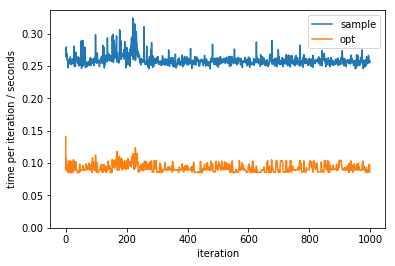

In [15]:
plt.plot(res['times_sample'], label='sample')
plt.plot(res['times_opt'], label='opt')
plt.gca().set_ylim(bottom=0)
plt.legend();
plt.xlabel('iteration')
plt.ylabel('time per iteration / seconds');

In [16]:
ni = 50
nj = 100
theta = np.linspace(-env.params['maxabs_theta'], env.params['maxabs_theta'], ni)
omega = np.linspace(-env.params['maxabs_omega'], env.params['maxabs_omega'], nj)
a = np.empty((nj, ni))
V = np.empty((nj, ni))
for i in range(ni):
    for j in range(nj):
        z = np.array([theta[i], omega[j]])
        s = env.z2s(z)
        a[j, i] = agent.action_greedy(s)
        V[j, i] = agent.value(s)

a_lim = np.max(np.abs(a))
c = plt.pcolor(theta, omega, a, cmap='coolwarm', vmin=-a_lim, vmax=a_lim)
plt.title('action')
plt.xlabel('theta')
plt.ylabel('omega')
plt.colorbar(c);

plt.figure()
c = plt.pcolor(theta, omega, V)
plt.title('value')
plt.xlabel('theta')
plt.ylabel('omega')
plt.colorbar(c);

KeyError: 'maxabs_theta'

# Pendulum simulation with agent

In [18]:
T = 200
env.reset()
s = np.zeros((T, env.observation_dim))
r = np.zeros(T)
a = np.zeros(T)
time = np.zeros(T)
s[0,:] = env.s
for t in range(1,T):
    a[t] = agent.action_greedy(s[t-1,:])
    s[t,:], r[t], _ = env.step(a[t])
    time[t] = (t - 1) * env.params['dt']

average reward per step = -0.33818612398563425


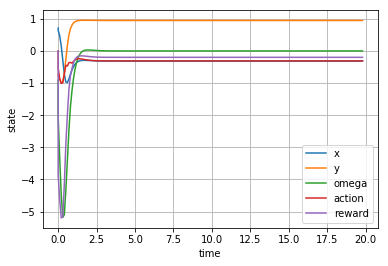

In [19]:
plt.plot(time, s[:,0], label='x')
plt.plot(time, s[:,1], label='y')
plt.plot(time, s[:,2], label='omega')
plt.plot(time, a, label='action')
plt.plot(time, r, label='reward')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.grid()
print(f'average reward per step = {np.mean(r)}')

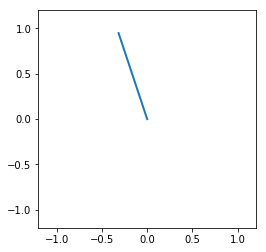

In [20]:
anim = animate(s)
HTML(anim.to_jshtml())

In [ ]:
for p in agent.net.parameters():
    print(p)